In [27]:
import pandas as pd

In [28]:
import random

In [29]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [30]:
len(L)

10000

In [31]:
L[:5]

[11, 7, 8, 6, 8]

In [32]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [33]:
import numpy as np
np.cumsum(s)

2     0.0289
3     0.0806
4     0.1662
5     0.2705
6     0.4102
7     0.5757
8     0.7153
9     0.8288
10    0.9141
11    0.9722
12    1.0000
Name: count, dtype: float64

<Axes: >

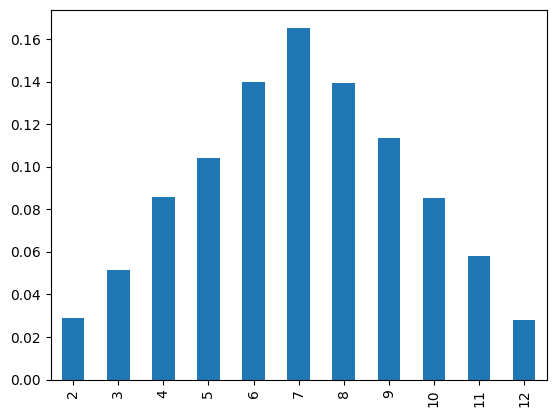

In [34]:
s.plot(kind='bar')

<Axes: >

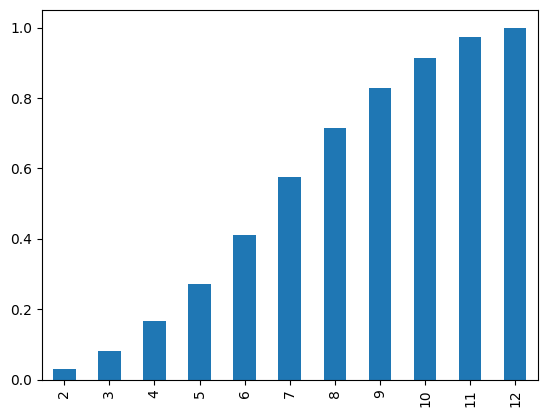

In [35]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [37]:
sample.mean()

50.06873258467563

(array([ 15.,  42., 100., 211., 264., 209., 114.,  30.,   9.,   6.]),
 array([36.1908106 , 39.28020336, 42.36959611, 45.45898887, 48.54838162,
        51.63777438, 54.72716713, 57.81655989, 60.90595264, 63.9953454 ,
        67.08473815]),
 <BarContainer object of 10 artists>)

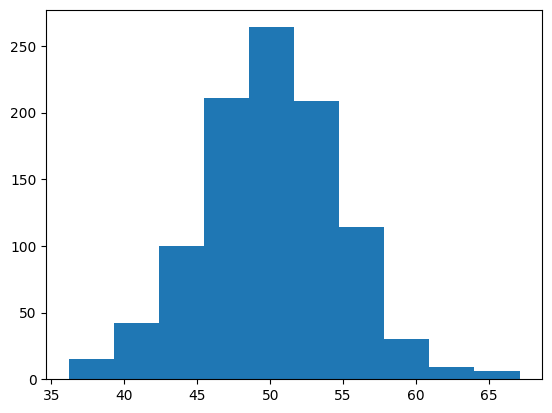

In [38]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [39]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [40]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(60, 12)

In [41]:
values = np.linspace(sample.min(),sample.max(),100)

In [42]:
sample.max()

67.08473815049825

In [43]:
probabilities = [dist.pdf(value) for value in values]

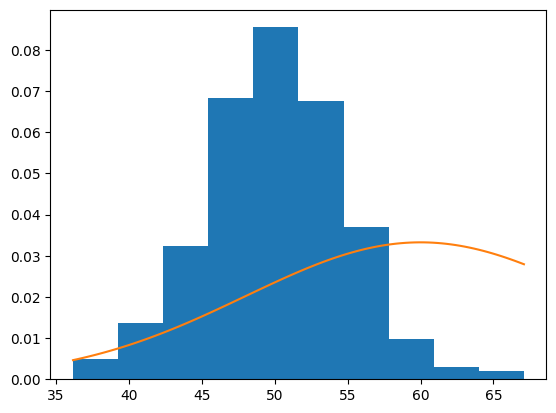

In [44]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

/var/folders/2n/v2zy3n991d94k9g19pvh8k5m0000gn/T/ipykernel_73230/1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

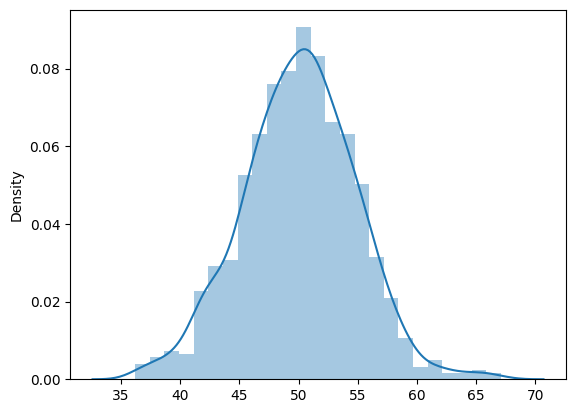

In [45]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [46]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [47]:
sample

array([20.41654028, 12.1455814 , 26.23865717, 20.5803383 ,  7.65597648,
       18.77821441, 23.94136283, 28.41029492, 14.82765153, 19.32624275,
       19.603729  , 14.91359031, 17.85286484, 33.38310797, 33.65614414,
       15.80387101, 20.35265149, 11.11765404, 14.12669418, 30.40628389,
       21.00840283, 25.53075703, 17.36122222, 18.3535313 , 19.23851736,
       23.80787015, 20.55393083, 27.17909046, 20.59757097, 19.76009936,
       20.77496368, 19.24023732, 20.39392237, 22.40174804, 20.0580146 ,
       25.75186474, 16.63608324, 17.28633199, 15.99909275, 20.75903716,
       14.73114124, 21.16819221, 17.9810974 , 17.22632888, 19.49075744,
       12.85255717, 21.81672032, 21.00364225, 26.59718818, 22.92183301,
       21.93008336, 16.80942019, 13.26400574, 16.78119926, 25.03814626,
       16.84608804, 22.74815625, 12.31384417, 14.91224309, 24.61492478,
       21.75408838, 24.45641902, 17.71821465, 16.94724593, 19.93534312,
       21.75715977, 13.50730378, 22.06577227, 19.25299955, 19.27

(array([ 2.,  0.,  6.,  7.,  6.,  7.,  6., 18., 14., 25., 24., 22., 24.,
        26., 16., 26., 17.,  8., 15.,  8.,  8.,  9., 17.,  6., 16., 21.,
        30., 33., 34., 42., 38., 50., 54., 54., 45., 45., 37., 43., 27.,
        28., 25., 13., 17., 15.,  3.,  4.,  2.,  4.,  1.,  2.]),
 array([ 7.65597648,  8.62226552,  9.58855455, 10.55484359, 11.52113263,
        12.48742167, 13.45371071, 14.41999974, 15.38628878, 16.35257782,
        17.31886686, 18.2851559 , 19.25144494, 20.21773397, 21.18402301,
        22.15031205, 23.11660109, 24.08289013, 25.04917916, 26.0154682 ,
        26.98175724, 27.94804628, 28.91433532, 29.88062435, 30.84691339,
        31.81320243, 32.77949147, 33.74578051, 34.71206954, 35.67835858,
        36.64464762, 37.61093666, 38.5772257 , 39.54351473, 40.50980377,
        41.47609281, 42.44238185, 43.40867089, 44.37495992, 45.34124896,
        46.307538  , 47.27382704, 48.24011608, 49.20640511, 50.17269415,
        51.13898319, 52.10527223, 53.07156127, 54.0378503 ,

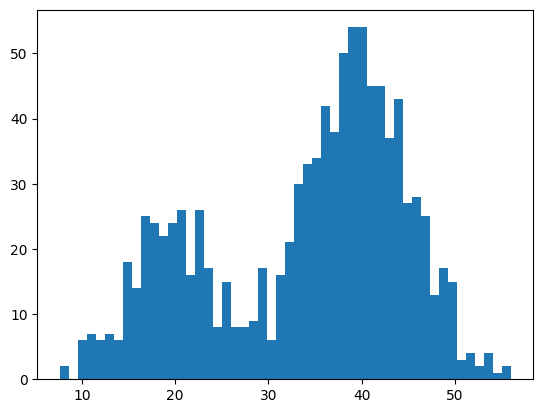

In [48]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [49]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [50]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [51]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

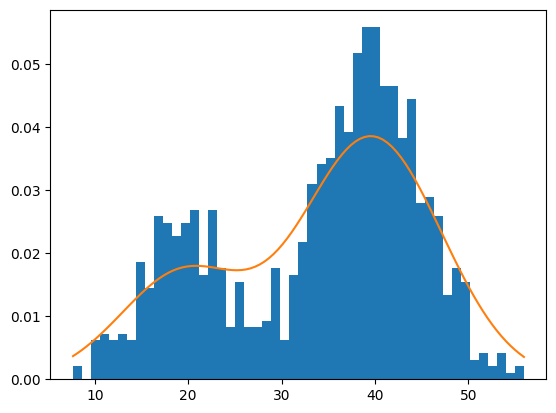

In [52]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

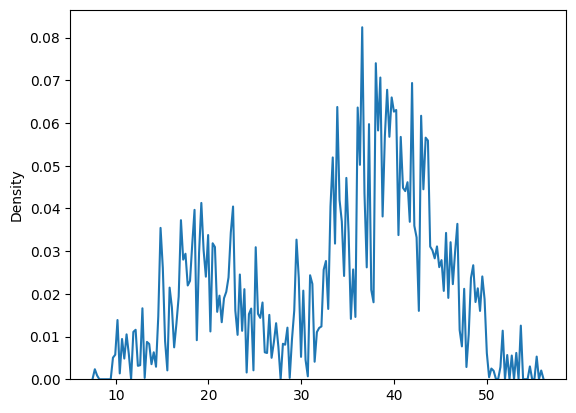

In [53]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [1]:
import seaborn as sns

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

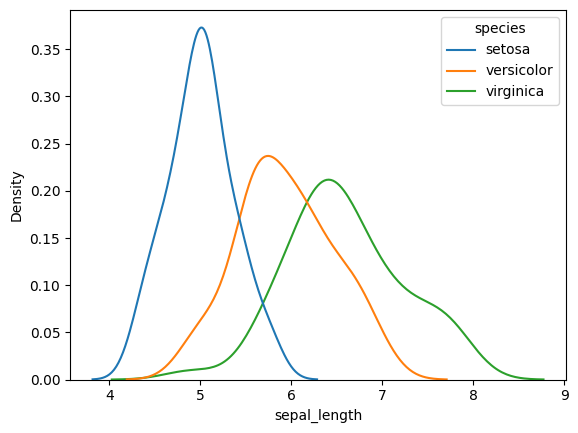

In [6]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

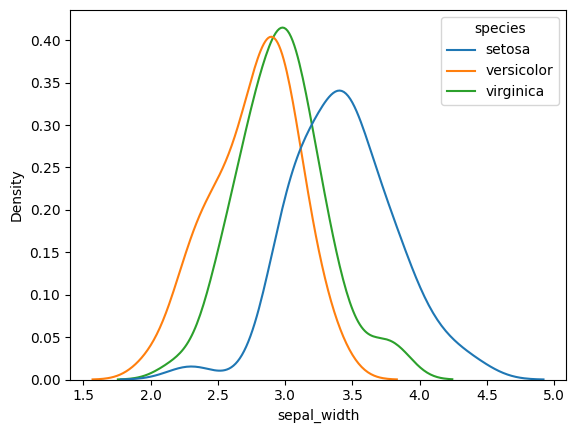

In [7]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

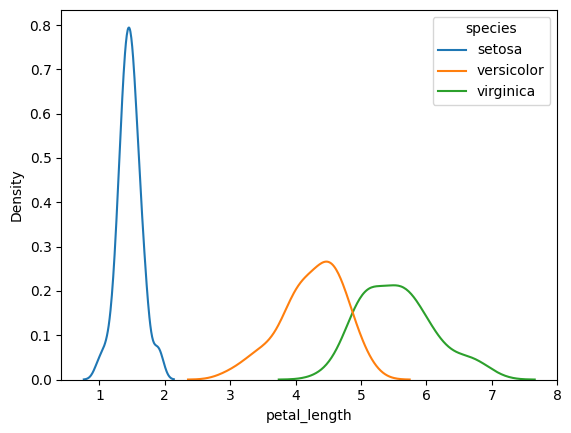

In [8]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

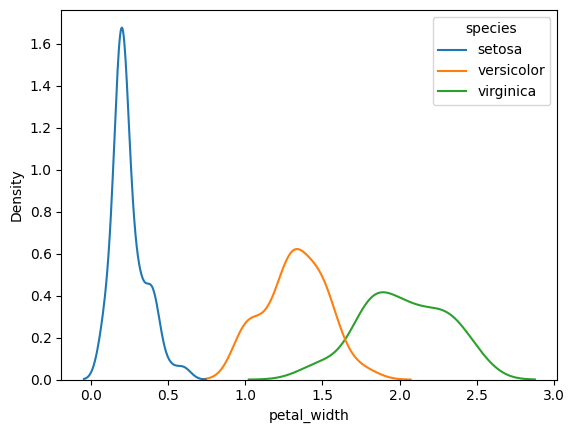

In [9]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Proportion'>

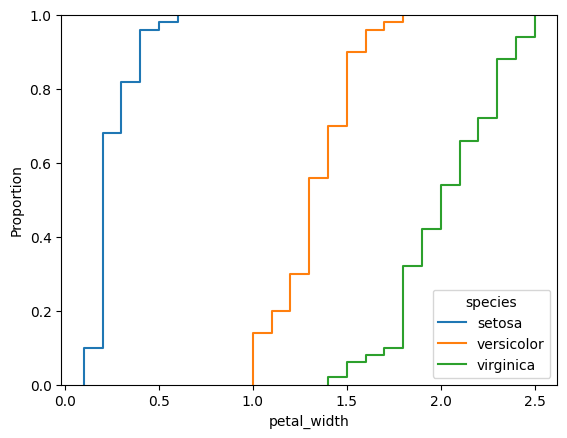

In [11]:
# sns.kdeplot(df['petal_width'],hue=df['species'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [13]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

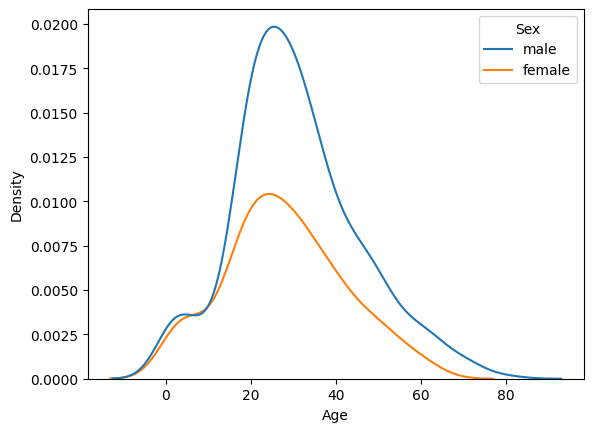

In [15]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

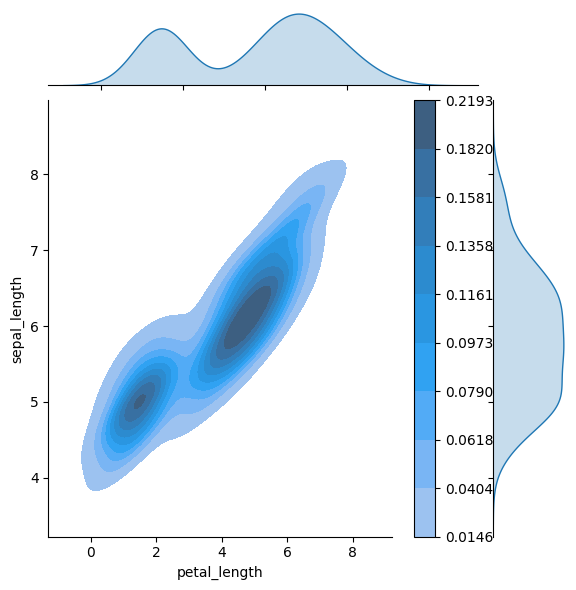

In [16]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

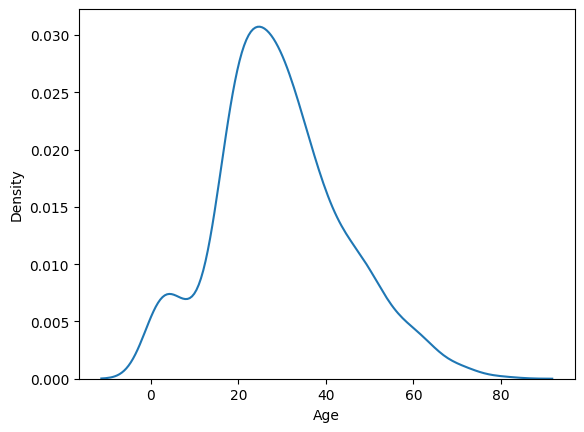

In [17]:
sns.kdeplot(titanic['Age'])

In [18]:
titanic['Age'].mean()

29.69911764705882

In [19]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

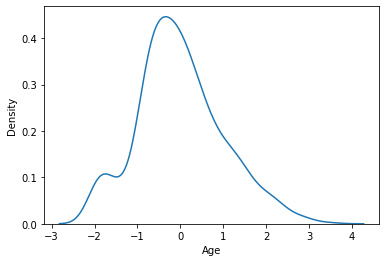

In [ ]:
sns.kdeplot(x)

In [20]:
x.mean()

2.338621049070358e-16

In [21]:
x.std()

1.0

In [22]:
titanic['Age'].skew()

0.38910778230082704

In [23]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406094

In [24]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [25]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [26]:
titanic['Age'].max()

80.0